## Diabetes Detection Project

This notebook contains the code developed for the Diabetes Detection Project. Throughout the document, all stages of the classification workflow are presented in a structured manner: data loading and exploration, data preprocessing, model construction and evaluation, and results analysis.

In addition to the code, detailed explanations are included to help understand each step taken and the methodological decisions made during the project.

### Web con el trabajo hecho:
https://www.kaggle.com/code/zabihullah18/diabetes-prediction/notebook

#### DataSet Information

The Diabetes Health Indicators Dataset is a public dataset available on Kaggle and the UCI Machine Learning Repository (https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?). It originates from the CDC’s BRFSS (Behavioral Risk Factor Surveillance System) survey, a large-scale epidemiological study conducted in the United States. The dataset contains over 70,000 samples and 35 features that include demographic information, lifestyle habits, health indicators, and responses to medical questionnaires.


The task addressed in this project is a supervised classification problem, where the target variable represents the patient's diabetes status with three classes:

- 0: Healthy
- 1: Prediabetes
- 2: Diabetes

Now, the different explanatory variables are described, together with their possible values.

| Variable              | Description                                                                                  | Possible values                                |
|-----------------------|----------------------------------------------------------------------------------------------|-----------------------------------------------|
| **Diabetes**          | Patient's diabetes status                                                                    | No, Pre-Diabetes, Diabetes                    |
| **HighBP**            | High blood pressure                                                                          | No, Yes                                       |
| **HighChol**          | High cholesterol                                                                             | No, Yes                                       |
| **CholCheck**         | Cholesterol check performed in the last 5 years                                              | No, Yes                                       |
| **Smoker**            | Has smoked at least 100 cigarettes in their lifetime                                         | No, Yes                                       |
| **Stroke**            | History of stroke                                                                            | No, Yes                                       |
| **HeartAttack**       | History of coronary heart disease or heart attack                                            | No, Yes                                       |
| **PhysActivity**      | Physical activity during the past 30 days                                                    | No, Yes                                       |
| **Fruits**            | Consumes fruit one or more times per day                                                     | No, Yes                                       |
| **Veggies**           | Consumes vegetables one or more times per day                                                | No, Yes                                       |
| **Heavy_drinking**    | Heavy alcohol consumption (men >14, women >7 drinks per week)                                | No, Yes                                       |
| **HealthCare**        | Has any kind of health care coverage (insurance, HMO, etc.)                                  | No, Yes                                       |
| **Unaffordable_care** | Needed to see a doctor in the past 12 months but could not due to cost                       | No, Yes                                       |
| **GeneralHealth**     | Self-reported general health                                                                 | Excellent, Very Good, Good, Fair, Poor         |
| **PhysicalHealth**    | Number of days in the past month with physical health issues                                  | Numeric value (0–30)                          |
| **MentalHealth**      | Number of days in the past month with mental health issues                                    | Numeric value (0–30)                          |
| **DiffWalk**          | Difficulty walking or climbing stairs                                                        | No, Yes                                       |
| **Sex**               | Patient sex                                                                                  | Female, Male                                  |
| **Age**               | Age                                                                                  | Scale 1-13                                 |
| **Education**               | Education Level                                                                                   | Scale 1-6                                |
| **Income**               | Income Sacale                                                                                  | Scale 1-8                                 |


In [1]:
import json 

with open('../data/dictionary.json', 'r') as f:
    data_dict = json.load(f)

# display(data_dict)

### 1. First exploration and Cleaning of the Dataset (EDA)

Before diving into preprocessing and different models, we will perform a first inspection of the dataset to understand its structure, dimensions, variables, and identify potential initial problems that need correction, such as standardizing column names.

In this step:
1. We will examine the dataset's shape and a sample of its first rows.
2. We will review data types and unique values for a quick inspection.
3. We will rename the columns to make them more readable and consistent with the variable description.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
import math


In [3]:
# Ruta del archivo CSV
archivo_csv = "../data/diabetes_012_health_indicators_BRFSS2015.csv"

# Cargar el CSV en un DataFrame
df = pd.read_csv(archivo_csv)
df.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Some modifications on variables names, and variables types:

In [5]:
df.rename(columns={'Diabetes_012': 'Diabetes'}, inplace=True)
df.rename(columns={'HeartDiseaseorAttack': 'HeartAttack'}, inplace=True)
df.rename(columns={'HvyAlcoholConsump': 'Heavy_drinking'}, inplace=True)
df.rename(columns={'AnyHealthcare': 'HealthCare'}, inplace=True)
df.rename(columns={'NoDocbcCost': 'Unaffordable_care'}, inplace=True)
df.rename(columns={'GenHlth': 'GeneralHealth'}, inplace=True)
df.rename(columns={'MentHlth': 'MentalHealth'}, inplace=True)
df.rename(columns={'PhysHlth': 'PhysicalHealth'}, inplace=True)

In [6]:
# Función para restaurar MentalHealth y PhysicalHealth como numéricas en el JSON
def original_dict(dict_path='../data/dictionary.json'):
    import json

    with open(dict_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    data['MentalHealth'] = {
        "type": "numerical",
        "map": {},
        "description": "Number of days in past 30 days mental health was not good (1–30)"
    }

    data['PhysicalHealth'] = {
        "type": "numerical",
        "map": {},
        "description": "Number of days in past 30 days physical health was not good (1–30)"
    }

    with open(dict_path, 'w', encoding='utf-8') as f:
        json.dump(data, f, indent=2, ensure_ascii=False)
original_dict()


In [7]:
# Lista de columnas que queremos convertir a int
cols_to_int = [
    'Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
    'HeartAttack', 'PhysActivity', 'Fruits', 'Veggies', 'Heavy_drinking', 
    'HealthCare', 'Unaffordable_care', 'GeneralHealth', 'DiffWalk', 'Sex', 
    'Age', 'Education', 'Income',
]

# Convertir columnas a int antes de mapear
for col in cols_to_int:
    df[col] = df[col].astype(int)

Then, we separate the target variable (y), and the features (x)

In [8]:
TARGET_COL = 'Diabetes' # Class variable

ordinal_vars = [k for k, v in data_dict.items() if v["type"] == "ordinal"]
categorical_vars = [k for k, v in data_dict.items() if v["type"] == "categorical"]
numerical_vars = [k for k, v in data_dict.items() if v["type"] == "numerical"]


y = df[TARGET_COL]
X = df[numerical_vars + categorical_vars + ordinal_vars]

print(f"Forma de X (features): {X.shape}")
print(X.columns.tolist())
print(f"\nForma de y (target): {y.shape}")
print(y.value_counts())

Forma de X (features): (253680, 21)
['BMI', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartAttack', 'PhysActivity', 'Fruits', 'Veggies', 'Heavy_drinking', 'HealthCare', 'Unaffordable_care', 'DiffWalk', 'Sex', 'GeneralHealth', 'MentalHealth', 'PhysicalHealth', 'Age', 'Education', 'Income']

Forma de y (target): (253680,)
Diabetes
0    213703
2     35346
1      4631
Name: count, dtype: int64


### 2. Variable Exploration and Feature Understanding

This section initiates the Exploratory Data Analysis (EDA). Our goal is to understand the main characteristics of our dataset's features and the target variable. We will investigate the form, distribution, and potential issues within our variables, which is the necessary step before any model construction.

In [9]:
print("\nEstadísticas descriptivas (numéricas):")
print(df[numerical_vars].describe())


Estadísticas descriptivas (numéricas):
                 BMI
count  253680.000000
mean       28.382364
std         6.608694
min        12.000000
25%        24.000000
50%        27.000000
75%        31.000000
max        98.000000


Distribution of the numerical variables

In [10]:
print(numerical_vars)

['BMI']


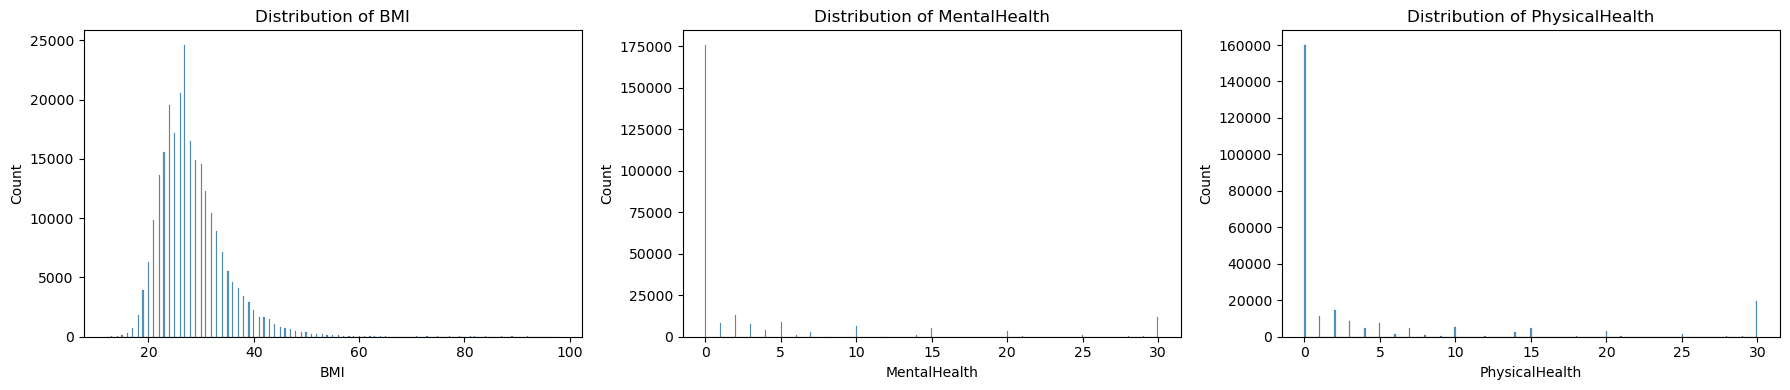

In [11]:
cols_to_plot = ['BMI', 'MentalHealth', 'PhysicalHealth']

fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(18, 4))
if len(cols_to_plot) == 1:
    axes = [axes]

for i, col in enumerate(cols_to_plot):
    sns.histplot(df[col], ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

As shown in the distribution plots of MentalHealth and PhysicalHealth, both variables are highly skewed and present clear heaping effects, with responses concentrated on small integers (1–5) and rounded values such as 10, 20, and 30 days. This behavior is typical of self-reported survey data.

To address this issue, both variables were discretized into ordinal categories representing ranges of days with poor mental or physical health. This reduces noise caused by rounding, preserves the ordinal structure, and simplifies their interpretation for the classification models.

In [12]:
# Funciones para discretizar MentalHealth y Physicalhealth
def discretize_numerical_features(value):
    """
    Discretiza los días de salud mental en categorías de 5 días:
    0: (0 días)
    1: (1-5 días)
    2: (6-10 días)
    3: (11-15 días)
    4: (16-20 días)
    5: (21-25 días)
    6: (26-30 días)
    """
    if value == 0:
        return 0
    elif 1 <= value <= 5:
        return 1
    elif 6 <= value <= 10:
        return 2
    elif 11 <= value <= 15:
        return 3
    elif 16 <= value <= 20:
        return 4
    elif 21 <= value <= 25:
        return 5
    else:  # 26-30
        return 6


# Función para actualizar el diccionario JSON con la discretización de MentalHealth
def discretize_in_dict(dict_path='../data/dictionary.json', variable=None):
    """
    Actualiza el diccionario JSON para reflejar que MentalHealth ahora es ordinal
    con categorías discretas de 5 días.
    
    Parameters:
    -----------
    dict_path : str
        Ruta al archivo dictionary.json
    """
    import json
    
    # Leer el JSON actual
    with open(dict_path, 'r') as f:
        data_dict = json.load(f)
    
    # Actualizar MentalHealth
    data_dict[variable] = {
        "type": "ordinal",
        "map": {
            "0": "0",
            "1": "1-5",
            "2": "6-10",
            "3": "11-15",
            "4": "16-20",
            "5": "21-25",
            "6": "26-30"
        },
        "description": f"Discretized {variable} (5-day groups). 0 = 0 days, 1 = 1-5 days, 2 = 6-10 days, 3 = 11-15 days, 4 = 16-20 days, 5 = 21-25 days, 6 = 26-30 days"
    }
    
    # Guardar el JSON actualizado
    with open(dict_path, 'w') as f:
        json.dump(data_dict, f, indent=2)
    
    print(f"✅ Diccionario JSON actualizado con {variable}")


In [13]:
# Aplicar discretización
df['MentalHealth'] = df['MentalHealth'].apply(discretize_numerical_features)
df['PhysicalHealth'] = df['PhysicalHealth'].apply(discretize_numerical_features)

discretize_in_dict(variable='MentalHealth')
discretize_in_dict(variable='PhysicalHealth')

for var in ['MentalHealth', 'PhysicalHealth']:
    if var in numerical_vars:
        numerical_vars.remove(var)
    if var not in ordinal_vars:
        ordinal_vars.append(var)

# numerical_vars.remove('MentalHealth')
# numerical_vars.remove('PhysicalHealth')


print(numerical_vars)
print(ordinal_vars)

✅ Diccionario JSON actualizado con MentalHealth
✅ Diccionario JSON actualizado con PhysicalHealth
['BMI']
['GeneralHealth', 'MentalHealth', 'PhysicalHealth', 'Age', 'Education', 'Income']


In [14]:
# #Guardar el dataset limpio

df.to_csv('../data/diabetes_012_cleaned.csv', index=False)
print("✅ Dataset limpio guardado en '../data/diabetes_012_cleaned.csv'")

✅ Dataset limpio guardado en '../data/diabetes_012_cleaned.csv'


Distribution of the binary features

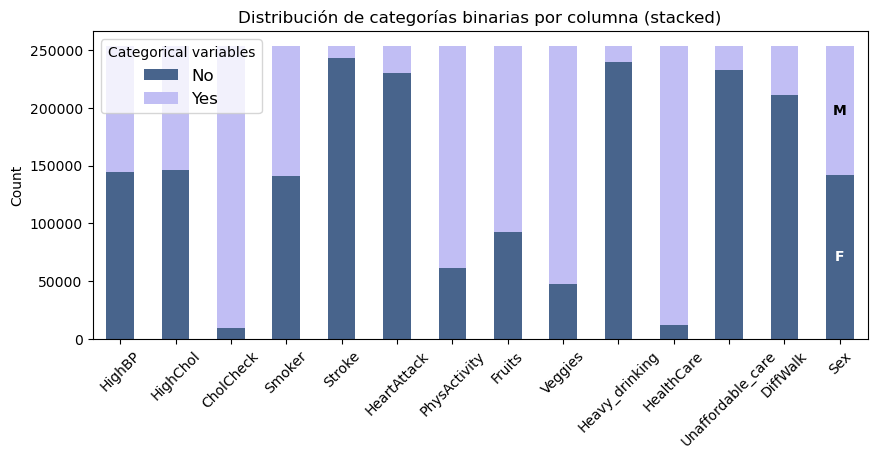

In [15]:
cat_counts = pd.DataFrame({col: df[col].value_counts() for col in categorical_vars if df[col].nunique() == 2}).T.fillna(0)
# cat_counts.plot(kind="bar", stacked=True, figsize=(10,4), color = ["#48648c", "#c1bef4"])

ax = cat_counts.plot(
    kind="bar",
    stacked=True,
    figsize=(10,4),
    color=["#48648c", "#c1bef4"]
)

plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Distribución de categorías binarias por columna (stacked)")
plt.legend(labels=['No', 'Yes'], title='Categorical variables', fontsize=12, title_fontsize=10) 

last_col_index = len(cat_counts.index) - 1
no_count = cat_counts.iloc[last_col_index, 0]
yes_count = cat_counts.iloc[last_col_index, 1]

ax.text(last_col_index,no_count / 2,'F',ha='center',va='center',color='white',fontweight='bold')

# Segmento superior
ax.text(last_col_index,no_count + yes_count / 2,'M',ha='center',va='center',color='black',fontweight='bold')

# plt.tight_layout()
plt.show()

Distribution of the categorical features with 3 or more different categories:

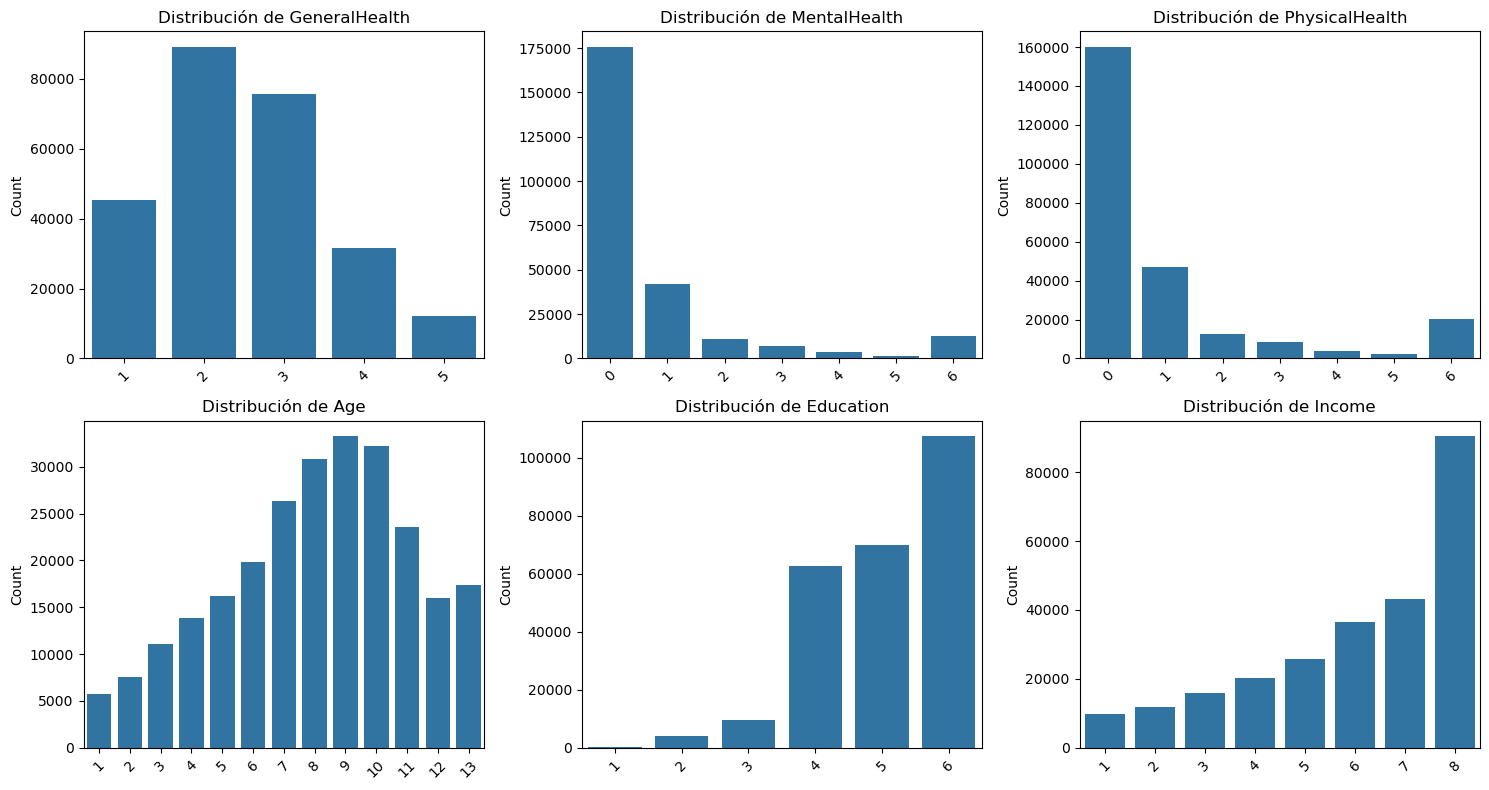

In [16]:
# Número de columnas no binarias
n_cols = len(ordinal_vars)
cols_por_fila = 3
n_filas = math.ceil(n_cols / cols_por_fila)

# Crear la figura y los ejes
fig, axes = plt.subplots(n_filas, cols_por_fila, figsize=(5*cols_por_fila, 4*n_filas))
axes = axes.flatten()  # para iterar fácilmente

for i, col in enumerate(ordinal_vars):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

#### Normalization and standarization of variables

The numeric variable BMI (Body Mass Index) is standardized to facilitate downstream modeling. Standardization rescales the variable to have a mean of 0 and a standard deviation of 1, which helps models that are sensitive to feature scale (e.g., logistic regression, SVMs, neural networks) converge faster and interpret coefficients more meaningfully. For ordinal variables, Min-Max normalization can be applied if a specific scale-sensitive model requires it, but by default they are left as integers to preserve interpretability without affecting most models.

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
# scaler = MinMaxScaler()

df_std = df.copy()
df_std[numerical_vars] = scaler.fit_transform(df[numerical_vars])

# ¿DEBERÍAMOS NORMALIZAR TAMBIÉN LAS ORDINALES? 
# scaler = MinMaxScaler()
# df_std[ordinal_vars] = scaler.fit_transform(df[ordinal_vars])

#### Outliers detection

Generando grid de 7 filas (2 bloques) y 4 columnas...


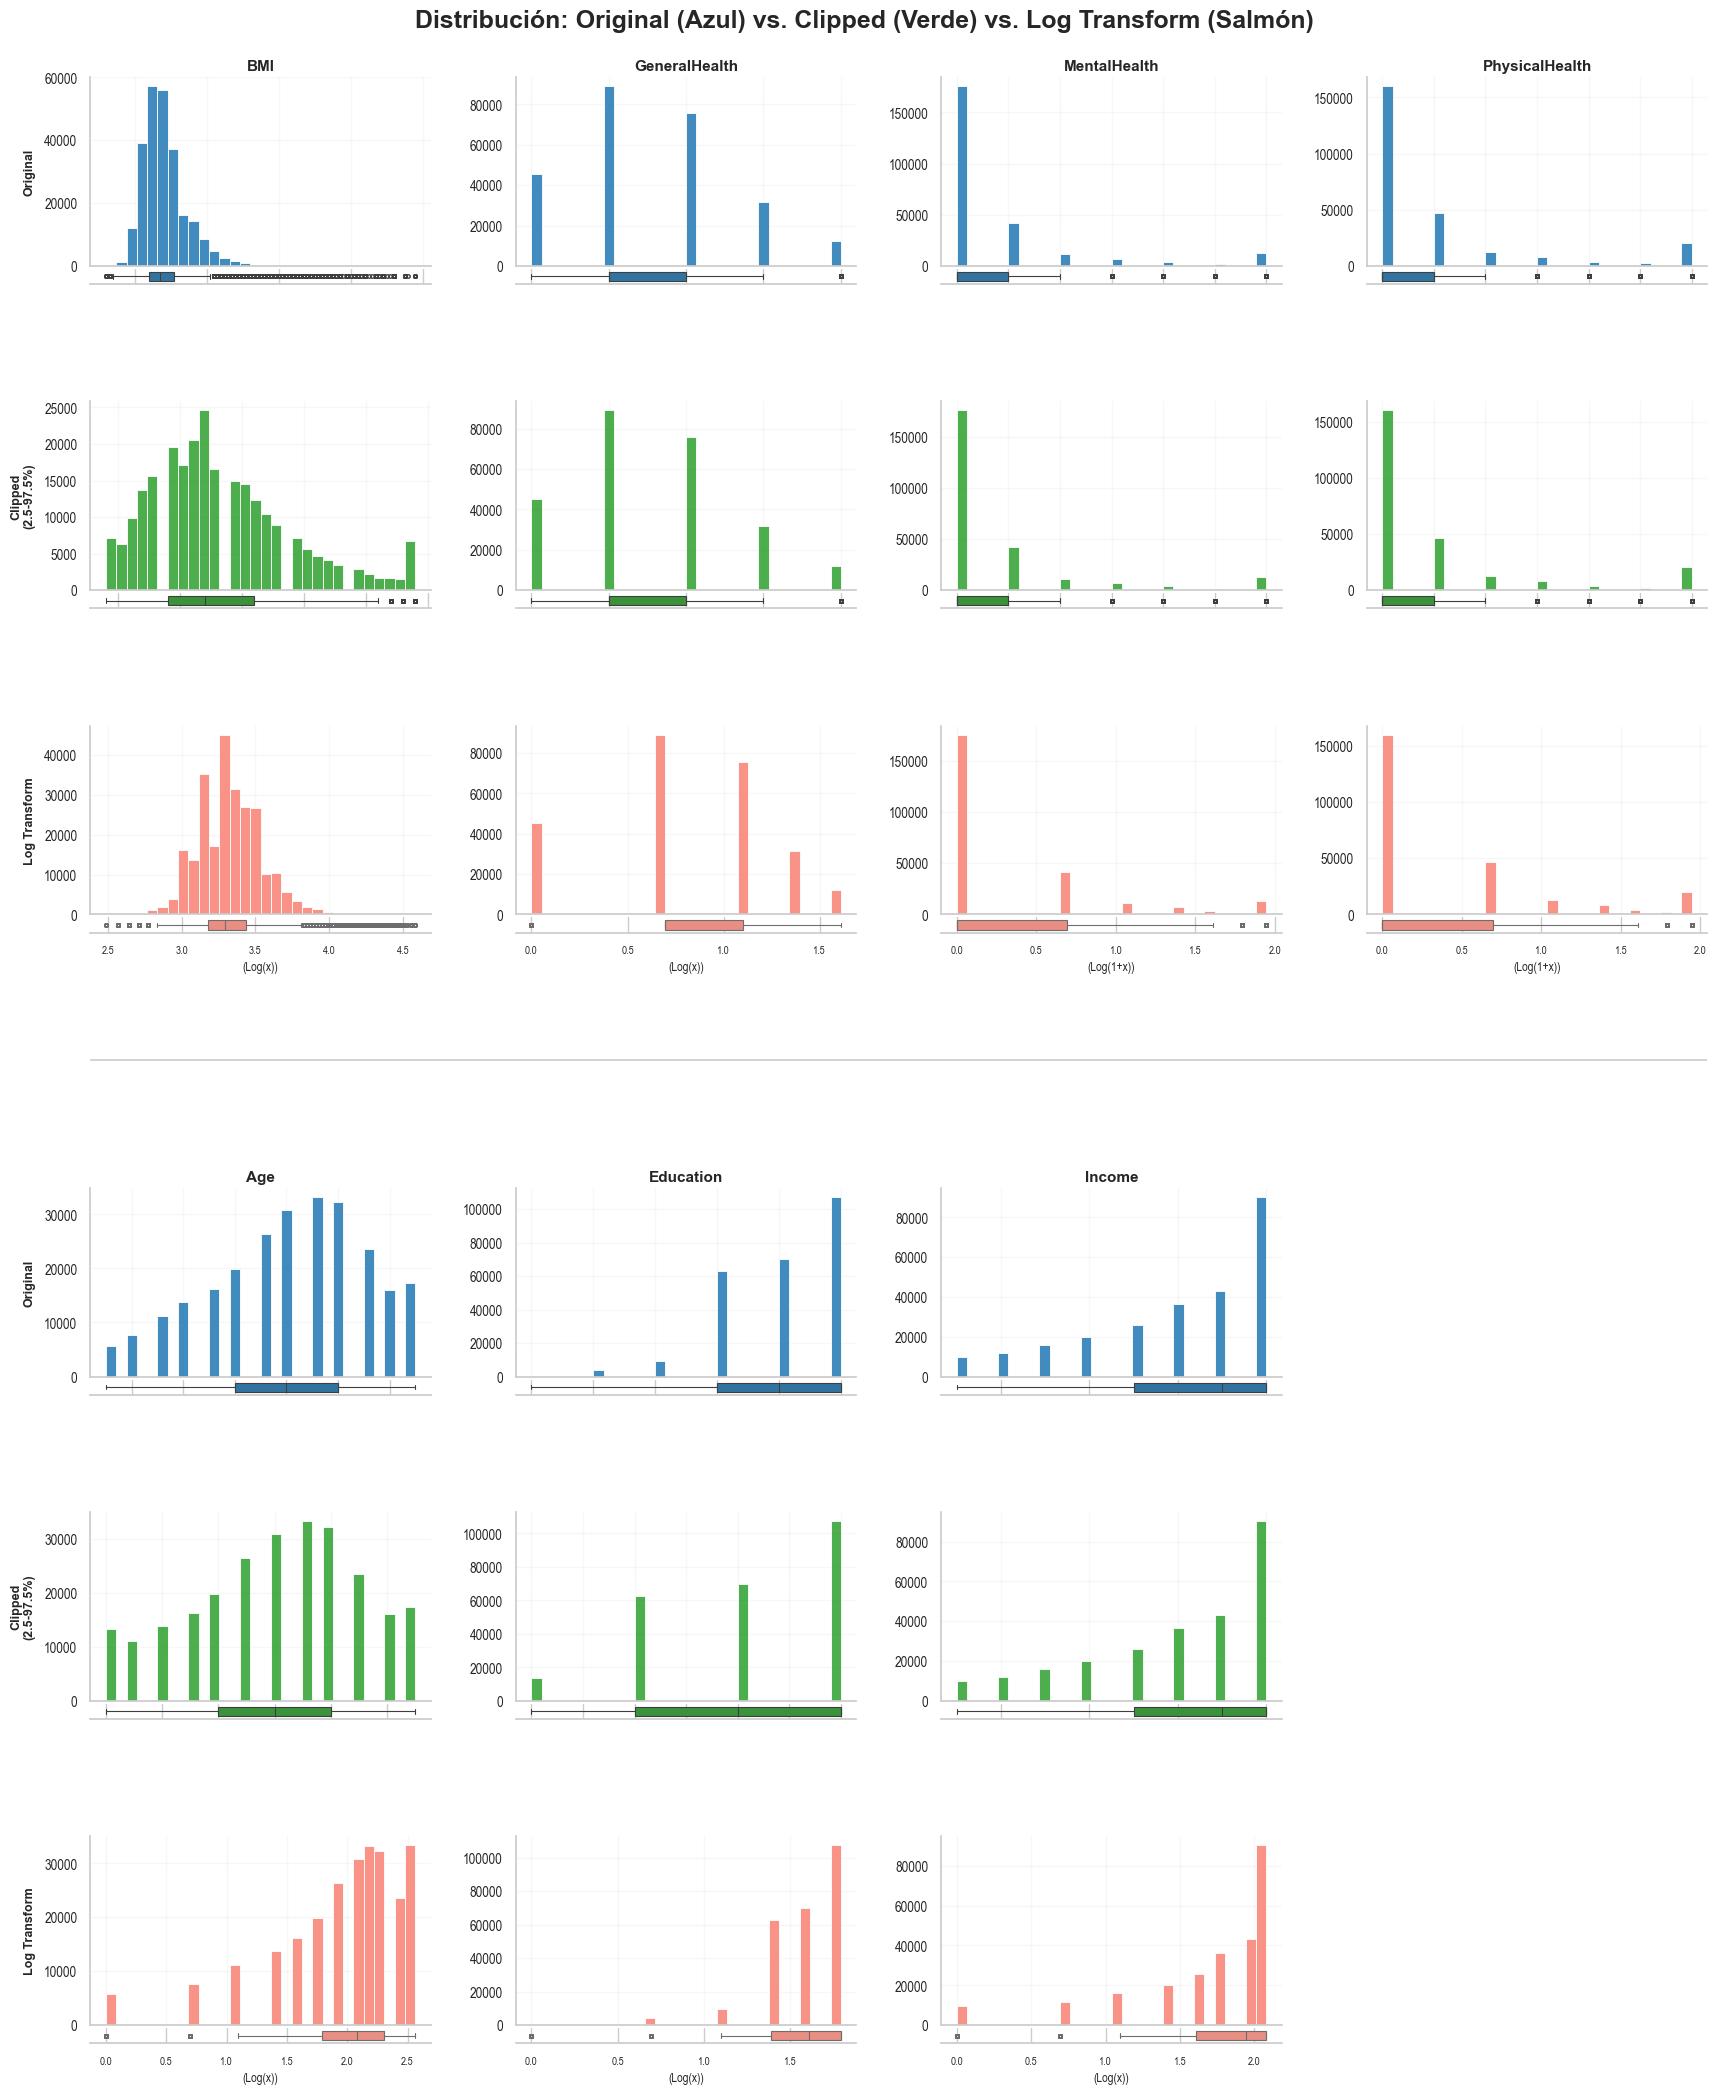

In [18]:
sns.set_theme(style="whitegrid", font_scale=0.95)

cols = 4
num_features = len(numerical_vars + ordinal_vars)
blocks = math.ceil(num_features / cols) # Número de "meta-filas"

# --- Lógica del Grid con Espaciadores ---
total_rows = (blocks * 3) + max(0, blocks - 1)
height_ratios = []
for b in range(blocks):
    height_ratios.extend([1, 1, 1]) # Ratios para [con, sin, log]
    if b < blocks - 1:
        height_ratios.extend([0.1]) # Ratio para el espaciador gris

# Paletas
color_with = "#1f77b4"   # azul
color_without = "#2ca02c" # verde
color_log = "#FA8072"      # rojo salmón

# Histogramas más altos respecto al boxplot
plot_height_ratios = [15, 1.2] # Más alto

# --- Figura y Grid ---
# Ajustar altura total de la figura para acomodar espaciadores
fig_height = (blocks * 10.8) + (max(0, blocks - 1) * 1.0) 
fig = plt.figure(figsize=(cols * 4.3, fig_height))
gs_main = fig.add_gridspec(total_rows, cols, hspace=0.65, wspace=0.25, height_ratios=height_ratios)

print(f"Generando grid de {total_rows} filas ({blocks} bloques) y {cols} columnas...")

for vi, col in enumerate(numerical_vars + ordinal_vars):
    block = vi // cols
    col_pos = vi % cols
    
    # Índices de fila ajustados para el espaciador
    row_con = block * 4
    row_sin = row_con + 1
    row_log = row_con + 2

    # --- Recorte de outliers (para fila 2) ---
    try:
        q_low, q_high = df[col].quantile(0.025), df[col].quantile(0.975)
        clipped = df[col].clip(q_low, q_high)
        clip_error = None
    except Exception as e:
        clipped = df[col] # Fallback
        clip_error = str(e)

    # --- Transformación Logarítmica (para fila 3) ---
    log_data = None
    log_label = "Log(x)"
    log_error = None
    try:
        min_val = df[col].min()
        if min_val > 0:
            log_data = np.log(df[col])
            log_label = "Log(x)"
        elif min_val >= 0:
            log_data = np.log1p(df[col])
            log_label = "Log(1+x)"
        else:
            shift = abs(min_val) + 1
            log_data = np.log(df[col] + shift)
            log_label = f"Log(x + {shift:.1f})"
    except Exception as e:
        log_error = str(e)


    # ===== 1. BLOQUE CON OUTLIERS (Azul) =====
    gs_con = gs_main[row_con, col_pos].subgridspec(2, 1, height_ratios=plot_height_ratios, hspace=0.03)
    ax_hist_with = fig.add_subplot(gs_con[0, 0])
    ax_box_with = fig.add_subplot(gs_con[1, 0], sharex=ax_hist_with)

    try:
        sns.histplot(df[col], bins=30, ax=ax_hist_with,
                     color=color_with, alpha=0.85, line_kws={'linewidth': 1.3})
        # Título de la columna, solo en el plot superior
        ax_hist_with.set_title(f"{col}", fontsize=11, weight='semibold', pad=5) 
        ax_hist_with.set_xlabel('')
        ax_hist_with.tick_params(axis='x', bottom=False, labelbottom=False)
        ax_hist_with.grid(alpha=0.15)
        if col_pos == 0:
            ax_hist_with.set_ylabel('Original', fontsize=9, weight='bold', labelpad=6)
        else:
            ax_hist_with.set_ylabel('')
        sns.despine(ax=ax_hist_with)
    except Exception as e:
        ax_hist_with.set_title(f"{col}\n(Error: {e})", fontsize=10, color='red')

    sns.boxplot(x=df[col], ax=ax_box_with, color=color_with, fliersize=2.5, linewidth=0.8, width=0.6)
    ax_box_with.set_yticks([])
    ax_box_with.set_xlabel('')
    ax_box_with.tick_params(axis='x', labelsize=8, bottom=False, labelbottom=False) 
    sns.despine(ax=ax_box_with, left=True, top=True, right=True)


    # ===== 2. BLOQUE SIN OUTLIERS (Verde) =====
    gs_sin = gs_main[row_sin, col_pos].subgridspec(2, 1, height_ratios=plot_height_ratios, hspace=0.03)
    ax_hist_without = fig.add_subplot(gs_sin[0, 0])
    ax_box_without = fig.add_subplot(gs_sin[1, 0], sharex=ax_hist_without)

    try:
        data_to_plot = clipped if clip_error is None else df[col]
        sns.histplot(data_to_plot, bins=30, ax=ax_hist_without,
                     color=color_without, alpha=0.85, line_kws={'linewidth': 1.3})
        ax_hist_without.set_title('') # Sin título aquí
        if clip_error:
             ax_hist_without.set_title(f"(Error clip: {clip_error})", fontsize=10, color='red')
        ax_hist_without.set_xlabel('')
        ax_hist_without.tick_params(axis='x', bottom=False, labelbottom=False)
        ax_hist_without.grid(alpha=0.15)
        if col_pos == 0:
            ax_hist_without.set_ylabel('Clipped\n(2.5-97.5%)', fontsize=9, weight='bold', labelpad=6)
        else:
            ax_hist_without.set_ylabel('')
        sns.despine(ax=ax_hist_without)
    except Exception as e:
        ax_hist_without.set_title(f"(Error plot: {e})", fontsize=10, color='red')

    sns.boxplot(x=data_to_plot, ax=ax_box_without, color=color_without, fliersize=2.5, linewidth=0.8, width=0.6)
    ax_box_without.set_yticks([])
    ax_box_without.set_xlabel('')
    ax_box_without.tick_params(axis='x', labelsize=8, bottom=False, labelbottom=False) 
    sns.despine(ax=ax_box_without, left=True, top=True, right=True)


    # ===== 3. BLOQUE CON LOG TRANSFORM (Salmón) =====
    gs_log = gs_main[row_log, col_pos].subgridspec(2, 1, height_ratios=plot_height_ratios, hspace=0.03)
    ax_hist_log = fig.add_subplot(gs_log[0, 0])
    ax_box_log = fig.add_subplot(gs_log[1, 0], sharex=ax_hist_log)

    try:
        if log_error:
            raise Exception(log_error)
        
        sns.histplot(log_data,  bins=30, ax=ax_hist_log,
                     color=color_log, alpha=0.85, line_kws={'linewidth': 1.3})
        ax_hist_log.set_title('') # Sin título aquí
        ax_hist_log.set_xlabel('')
        ax_hist_log.tick_params(axis='x', bottom=False, labelbottom=False)
        ax_hist_log.grid(alpha=0.15)
        if col_pos == 0:
            ax_hist_log.set_ylabel('Log Transform', fontsize=9, weight='bold', labelpad=6)
        else:
            ax_hist_log.set_ylabel('')
        sns.despine(ax=ax_hist_log)
    except Exception as e:
        ax_hist_log.set_title(f"(Error Log: {e})", fontsize=10, color='red')

    if log_data is not None:
        # --- CORRECCIÓN AQUÍ ---
        # Cambiado de 'ax_log_box' a 'ax_box_log'
        sns.boxplot(x=log_data, ax=ax_box_log, color=color_log, fliersize=2.5, linewidth=0.8, width=0.6)
    
    ax_box_log.set_yticks([])
    # Etiqueta X solo con la transformación, el nombre de la col ya está arriba
    ax_box_log.set_xlabel(f"({log_label})", fontsize=9) 
    ax_box_log.tick_params(axis='x', labelsize=8)
    sns.despine(ax=ax_box_log, left=True, top=True, right=True)


# Ocultar huecos vacíos
for i in range(num_features, blocks * cols):
    block_num = i // cols
    col_num = i % cols
    for row_offset in [0, 1, 2]: # Ocultar las 3 filas de plot
        try:
            ax = fig.add_subplot(gs_main[block_num * 4 + row_offset, col_num])
            ax.set_visible(False)
        except:
            pass

# --- Añadir líneas separadoras ---
for b in range(blocks - 1):
    spacer_row_index = (b * 4) + 3 # Índice de la fila espaciadora
    ax_spacer = fig.add_subplot(gs_main[spacer_row_index, :]) # Span all columns
    ax_spacer.axhline(0.5, color='#CCCCCC', linewidth=1.2)
    ax_spacer.axis('off')

# Título más pegado a los plots
plt.suptitle("Distribución: Original (Azul) vs. Clipped (Verde) vs. Log Transform (Salmón)",
             fontsize=18, weight='bold', y=0.97) 
fig.subplots_adjust(top=0.94, bottom=0.07, left=0.05, right=0.99)

plt.show()



#### Correlation analysis

We will evaluate the correlations both between the explanatory variables and the target variable, as well as among the explanatory variables themselves. Using a heatmap, this analysis helps identify which features are most related to the target and also detect strong interdependencies between predictors that could affect model performance.

C:\Users\SergioBeamonteGonzal\AppData\Local\Temp\ipykernel_9012\2282197755.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\SergioBeamonteGonzal\AppData\Local\Temp\ipykernel_9012\2282197755.py:23: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(


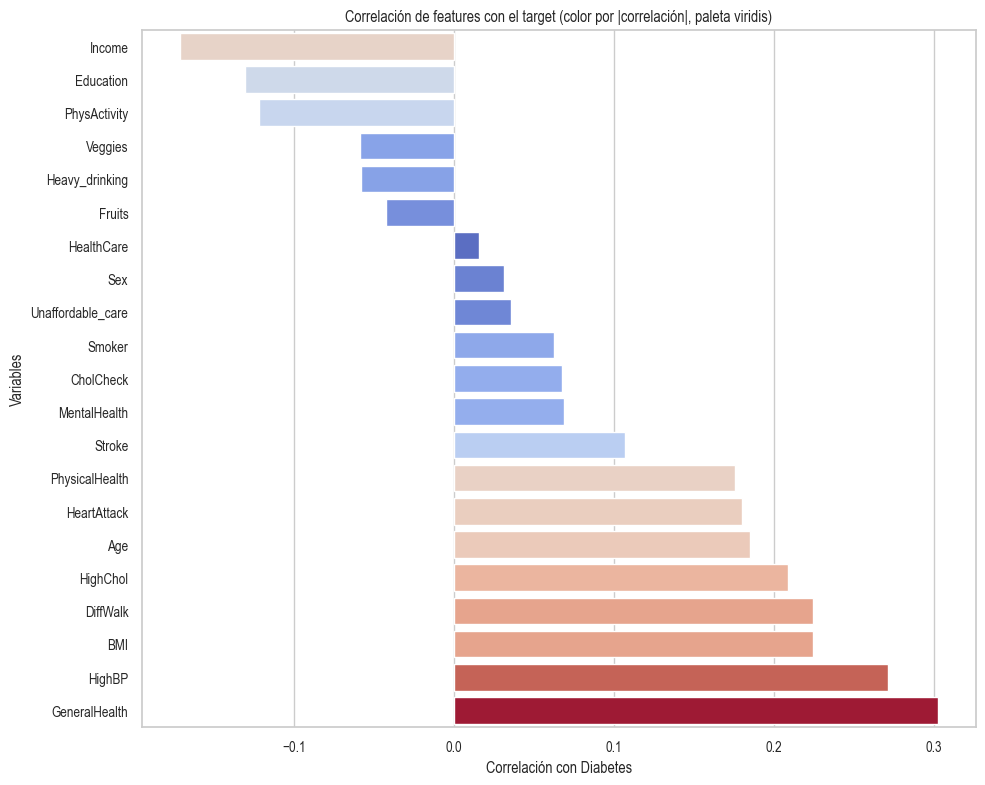

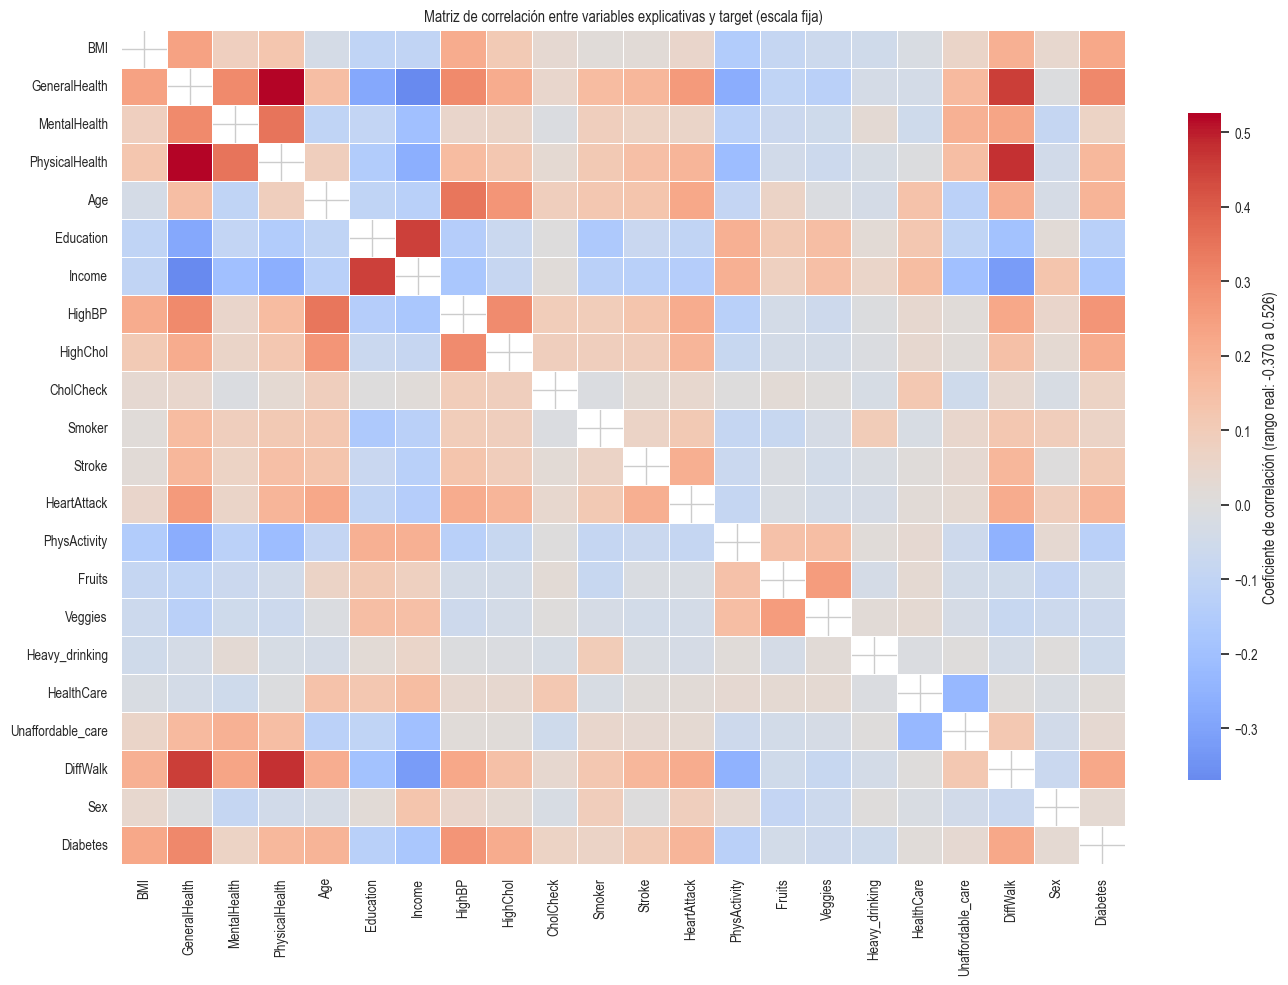

In [19]:
# --- Correlación de variables explicativas con la target ---
cols_to_corr = numerical_vars + ordinal_vars + categorical_vars + [TARGET_COL]

corr_matrix = df[cols_to_corr].corr()
corr_with_target = corr_matrix[TARGET_COL].sort_values(ascending=True)

# print(f"\n--- Correlación de las variables con la variable target (orientado a FSS) ---")
# print(corr_with_target.drop(TARGET_COL))

# ==========  BARRAS DE CORRELACIÓN CON LA VARIABLE OBJETIVO =========
corr_vals = corr_with_target.drop(TARGET_COL)

# Normalizar valores para mapear a color (usando magnitud)
norm = plt.Normalize(vmin=0, vmax=corr_vals.abs().max())

# Paleta alternativa: viridis, plasma, magma, inferno, cividis, crest...
# cmap = plt.cm.viridis  
cmap = plt.cm.coolwarm  

colors = cmap(norm(corr_vals.abs()))

plt.figure(figsize=(10, 8))
sns.barplot(
    x=corr_vals,
    y=corr_vals.index,
    orient="h",
    palette=colors
)
plt.title("Correlación de features con el target (color por |correlación|, paleta viridis)")
plt.xlabel("Correlación con Diabetes")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()


# ==========  HEATMAP DE CORRELACIÓN ENTRE LAS VARIABLES ================

plt.figure(figsize=(14, 10))

# Obtener valores fuera de la diagonal
corr_no_diag = corr_matrix.where(~np.eye(corr_matrix.shape[0], dtype=bool))
mask = np.eye(corr_matrix.shape[0], dtype=bool)


# Calcular escala real mínima y máxima
vmin = corr_no_diag.min().min()   # mínimo fuera de la diagonal
vmax = corr_no_diag.max().max()   # máximo fuera de la diagonal

ax = sns.heatmap(
    corr_matrix,
    annot=False,
    cmap="coolwarm",
    center=0,
    mask=mask,
    linewidths=0.5,
    cbar=True,
    vmin=vmin,        # escala basada en correlaciones reales
    vmax=vmax,
    cbar_kws={
        "shrink": 0.8,
        "label": f"Coeficiente de correlación (rango real: {vmin:.3f} a {vmax:.3f})"
    }
)
plt.title("Matriz de correlación entre variables explicativas y target (escala fija)")
plt.tight_layout()
plt.show()


From these two plots, we can observe relevant information about the relationships between variables. Physical health, general health, and difficulty walking show a high degree of correlation among themselves. Regarding the target variable, general health appears to be the feature most strongly correlated with it. While these correlations do not provide definitive conclusions, they should be considered when interpreting the results of the models.

#### Target Balancing

The target variable is imbalanced, so we apply resampling techniques to ensure that each class is sufficiently represented, improving model training and performance without biasing predictions toward the majority class.

C:\Users\SergioBeamonteGonzal\AppData\Local\Temp\ipykernel_9012\2801081893.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Clase', y='Cantidad', data=plot_data, palette='viridis')


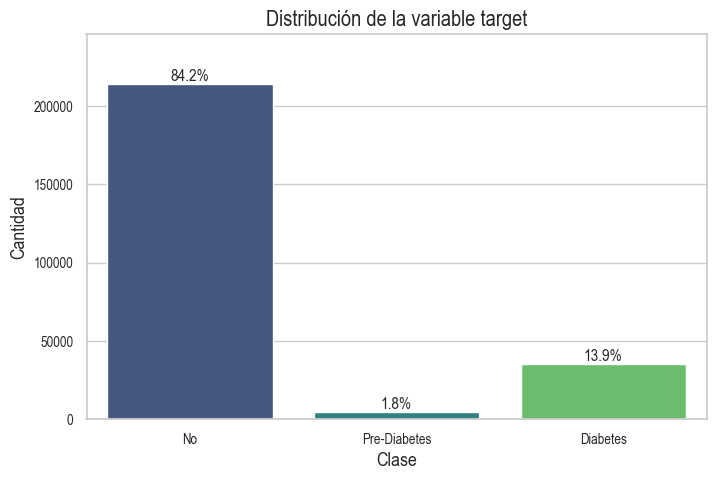

In [20]:
# Contar las clases
class_counts = df[TARGET_COL].value_counts().sort_index()  # Ordena por 0,1,2
class_percent = df[TARGET_COL].value_counts(normalize=True).sort_index() * 100

class_labels = {
    0: data_dict[TARGET_COL]['map']["0"],
    1: data_dict[TARGET_COL]['map']["1"],
    2: data_dict[TARGET_COL]['map']["2"]
}

# Preparar DataFrame para plotting
plot_data = pd.DataFrame({
    'Clase': [class_labels[i] for i in class_counts.index],
    'Cantidad': class_counts.values,
    'Porcentaje': class_percent.values
})

# Crear gráfico
plt.figure(figsize=(8,5))
sns.barplot(x='Clase', y='Cantidad', data=plot_data, palette='viridis')

# Añadir porcentaje sobre cada barra
for index, row in plot_data.iterrows():
    plt.text(x=index, y=row['Cantidad'] + max(class_counts)*0.01, 
             s=f"{row['Porcentaje']:.1f}%", 
             ha='center', fontsize=12)

plt.title('Distribución de la variable target', fontsize=16)
plt.xlabel('Clase', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.ylim(0, max(class_counts)*1.15)  # espacio para etiquetas
plt.show()


Since the main objective is to identify the factors that increase the risk of developing diabetes, the Prediabetes and Diabetes classes were combined into a single category. This is justified because both groups have a high risk of disease, and additionally, the Prediabetes class is extremely underrepresented (1.8%), which would make it difficult for the model to learn meaningful patterns and could lead to overfitting. Combining the two allows for training a more stable model focused on the overall risk of diabetes.

In [21]:
# Crear una copia del DataFrame para no alterar el original
df_mod = df.copy()

# Combinar Prediabetes (1) y Diabetes (2) en una sola clase '2' (Diabetes total)
df_mod[TARGET_COL] = df_mod[TARGET_COL].replace({1: 2, 2: 2})

# Opcional: verificar la distribución de la nueva variable objetivo
print(df_mod[TARGET_COL].value_counts(normalize=True) * 100)
print(df_mod[TARGET_COL].value_counts())

Diabetes
0    84.24117
2    15.75883
Name: proportion, dtype: float64
Diabetes
0    213703
2     39977
Name: count, dtype: int64


Then, to balance the target variable, the number of instances from the majority class (No Diabetes) was reduced and, optionally, the minority class (Total Diabetes) was slightly increased. Given that the dataset contains more than 200,000 instances, undersampling can be applied without a significant loss of information, preventing the majority class from dominating the model’s learning process. Before performing the balancing, the dataset is split into training and test sets to prevent information leakage and ensure an objective evaluation of the model’s performance.

In [22]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# --------------------------------
# Train / Test split (ANTES del balanceo)
# --------------------------------
def balanced_traintest(df, balance_ratio = 1, num_of_cases=12500, test_size=0.2, random_seed=42):

    y = df[TARGET_COL]
    X = df[numerical_vars + categorical_vars + ordinal_vars]

    X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=test_size,
    random_state=random_seed,
    stratify=y
    )

    # --------------------------------
    #Submuestreo de la clase mayoritaria (No Diabetes = 0)
    # --------------------------------
    train_data = X_train.copy()
    train_data[TARGET_COL] = y_train.copy()

    minor_class = train_data[train_data[TARGET_COL] == 2]
    major_class = train_data[train_data[TARGET_COL] == 0]

    major_class_downsampled = major_class.sample(
    n=int(round(num_of_cases/(balance_ratio+1))),
    random_state=random_seed
    )

    if minor_class.shape[0] > int(round(balance_ratio * num_of_cases/(balance_ratio+1))):
        minor_class = minor_class.sample(
        n=int(round(balance_ratio * num_of_cases/(balance_ratio+1))),
        random_state=random_seed
        )

    train_downsampled = pd.concat([major_class_downsampled, minor_class])

    X_down = train_downsampled.drop(columns=[TARGET_COL])
    y_down = train_downsampled[TARGET_COL]

    print(f'Diabetes:{minor_class.shape[0]}')
    print(f'No diabetes:{major_class_downsampled.shape[0]}')
    print(minor_class.shape[0]+major_class_downsampled.shape[0])

    # # --------------------------------
    # # 3️⃣ Sobremuestreo ligero de la clase minoritaria (opcional)
    # # --------------------------------

    if (int(round(balance_ratio * num_of_cases/(balance_ratio+1))) > minor_class.shape[0]) and (minor_class.shape[0] < major_class_downsampled.shape[0] * balance_ratio):
        print("applying smote")
        smote = SMOTE(
        sampling_strategy={0: int(round(num_of_cases/(balance_ratio+1))), 2: int(round(balance_ratio * num_of_cases/(balance_ratio+1)))},
        random_state=random_seed
        )

        X_train_final, y_train_final = smote.fit_resample(X_down, y_down)
        train_final = pd.concat([X_train_final.reset_index(drop=True), y_train_final.reset_index(drop=True)], axis=1)

    else:
        X_train_final, y_train_final = X_down, y_down
        train_final = pd.concat([X_train_final.reset_index(drop=True), y_train_final.reset_index(drop=True)], axis=1)

    #Representacion nueva distribución de la variable target tras el balanceo
    # Conteo y porcentajes
    class_counts = train_final[TARGET_COL].value_counts().sort_index()
    class_percent = train_final[TARGET_COL].value_counts(normalize=True).sort_index() * 100

    # Nombres de las nuevas clases
    class_labels = {
    0: "No Diabetes",
    2: "Diabetes (Prediabetes + Diabetes)"
    }

    # Preparar DataFrame para plotting
    plot_data = pd.DataFrame({
    'Clase': [class_labels[i] for i in class_counts.index],
    'Cantidad': class_counts.values,
    'Porcentaje': class_percent.values
    })

    # Crear gráfico
    plt.figure(figsize=(8,5))
    sns.barplot(x='Clase',y='Cantidad',data=plot_data,palette='viridis')

    # Añadir porcentaje encima de cada barra
    for index, row in plot_data.iterrows():
        plt.text(x=index,y=row['Cantidad'] + max(class_counts) * 0.01,s=f"{row['Porcentaje']:.1f}%",ha='center',fontsize=12)

    plt.title('Distribución de la variable target (clases combinadas)', fontsize=16)
    plt.xlabel('Clase', fontsize=14)
    plt.ylabel('Cantidad', fontsize=14)
    plt.ylim(0, max(class_counts) * 1.15)
    plt.show()

    test_final = X_test.copy()
    test_final[TARGET_COL]= y_test.copy()

    return (train_final, test_final)


Diabetes:6250
No diabetes:6250
12500


C:\Users\SergioBeamonteGonzal\AppData\Local\Temp\ipykernel_9012\1344674855.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Clase',y='Cantidad',data=plot_data,palette='viridis')


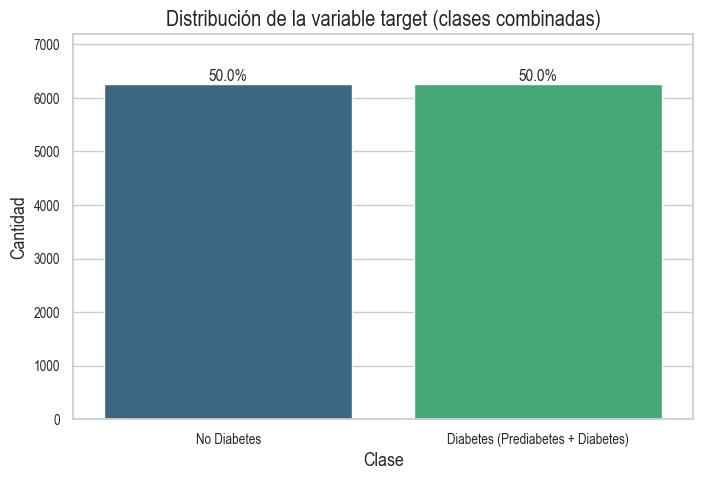

In [23]:
train_final, test_final = balanced_traintest(df_mod, balance_ratio = 1, num_of_cases=12500, test_size=0.2, random_seed=42)

train_final.to_csv("../data/diabetes_train.csv", index=False)
test_final.to_csv("../data/diabetes_test.csv", index=False)


Once our target variable is balanced and the dataset is ready for classification modeling, we can explore how several features are distributed across the target categories. This analysis helps us gain a deeper understanding of the variables and their potential relationship with diabetes risk.

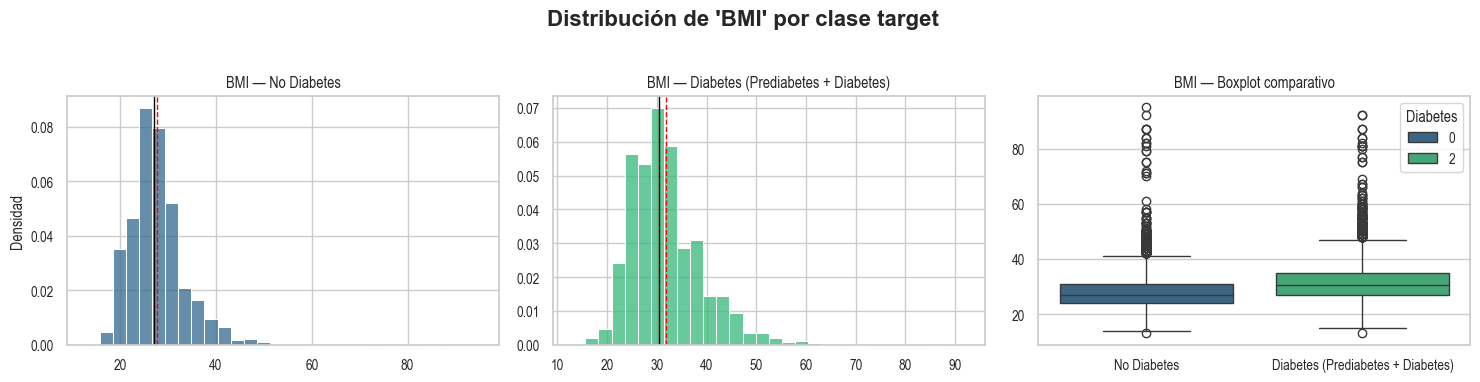

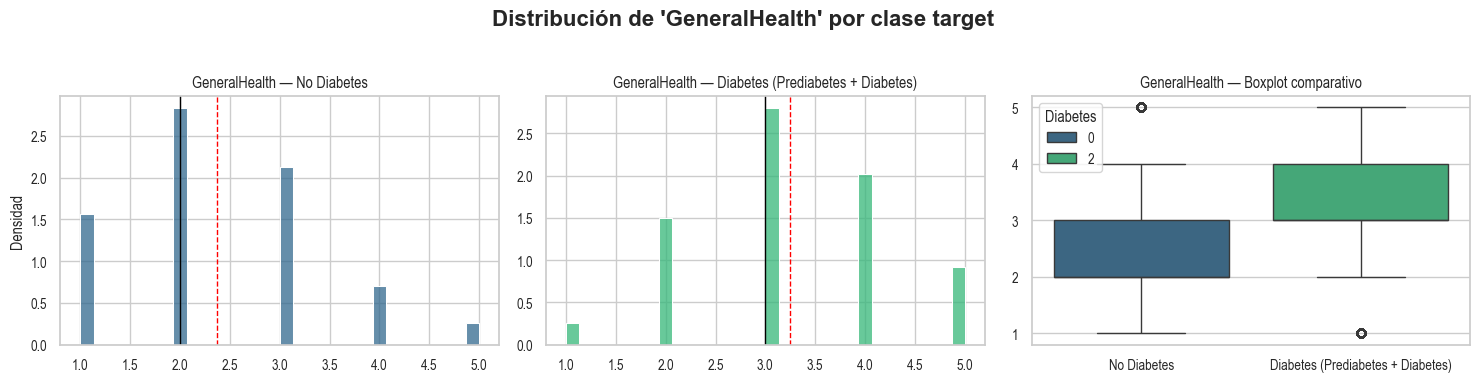

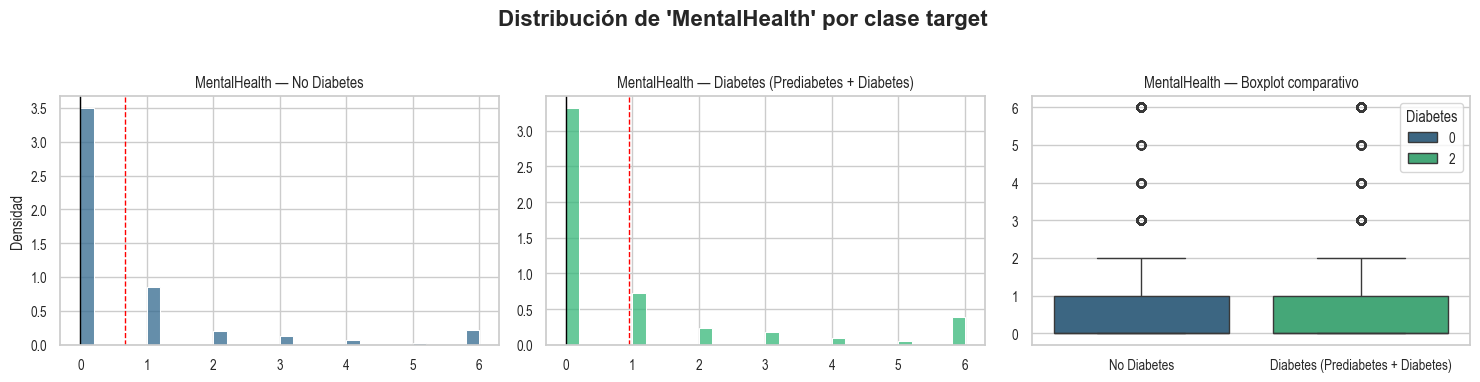

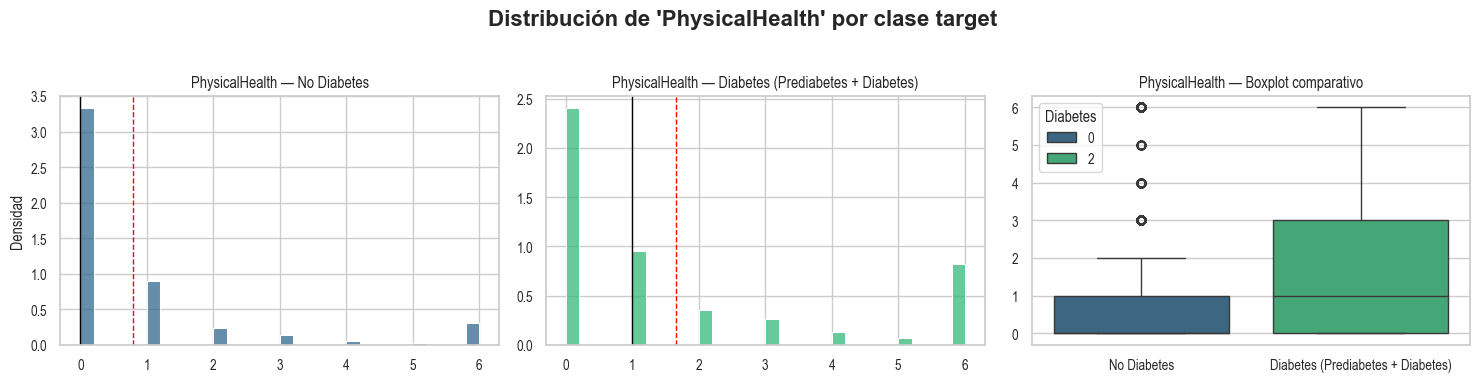

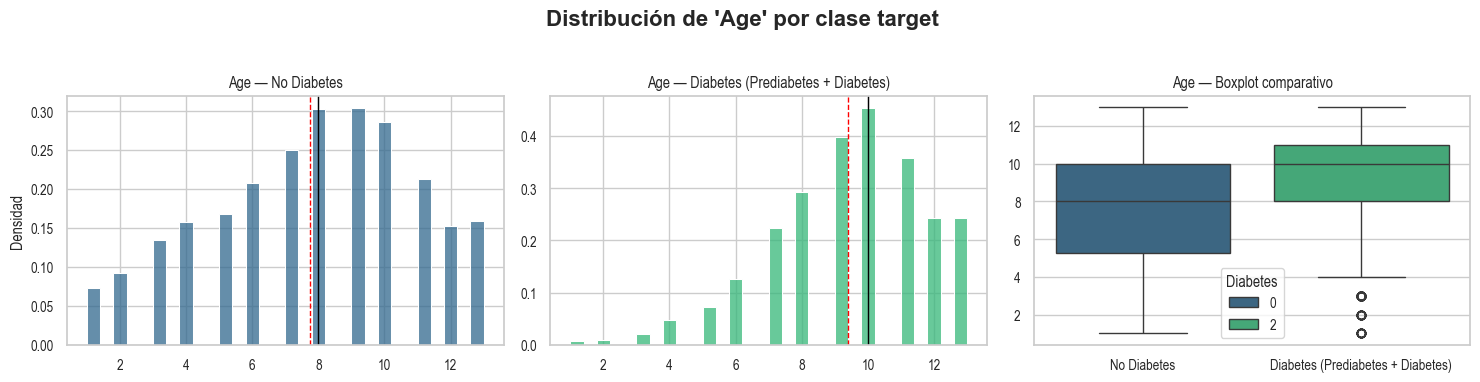

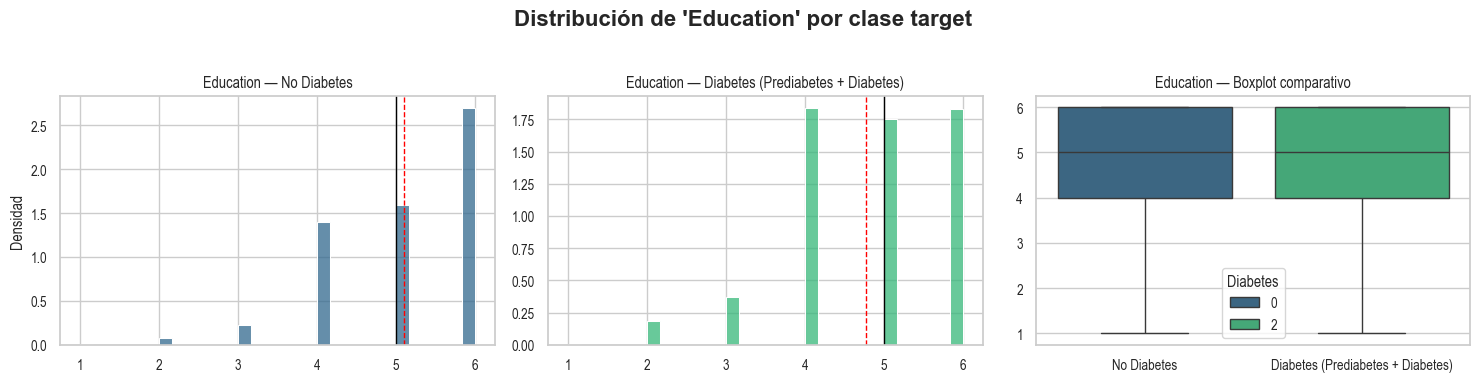

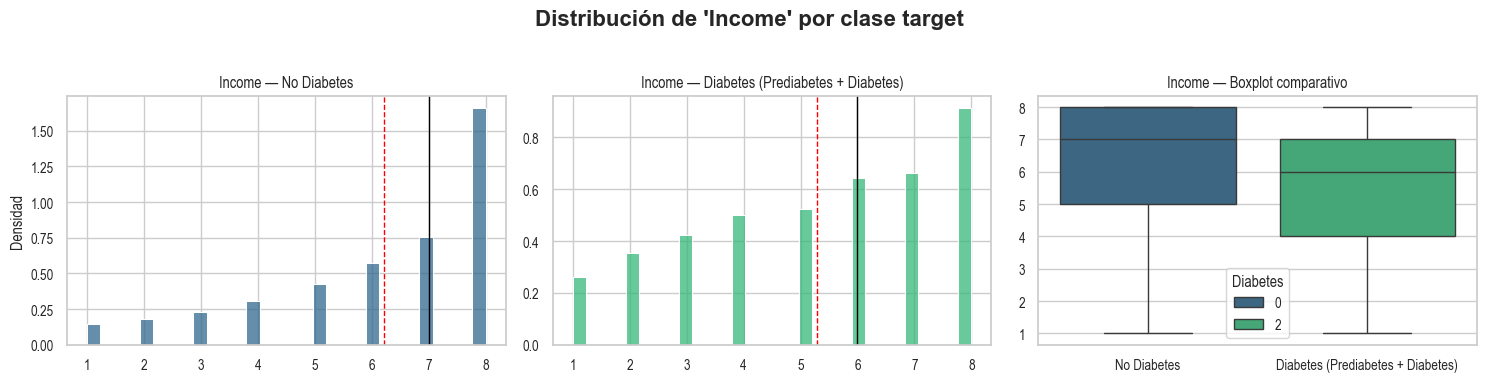

In [24]:
df = train_final.copy()

# Etiquetas de las nuevas clases
class_labels = {
    0: "No Diabetes",
    1: "Diabetes (Prediabetes + Diabetes)"
}

unique_classes = sorted(df[TARGET_COL].dropna().unique())
palette = sns.color_palette('viridis', n_colors=len(unique_classes))

for col in numerical_vars + ordinal_vars:
    fig, axes = plt.subplots(1, 3, figsize=(15,4))
    
    # Histograma clase 0
    subset0 = df[df[TARGET_COL]==0][col].dropna()
    sns.histplot(subset0, bins=30, ax=axes[0], color=palette[0], stat="density")
    axes[0].axvline(subset0.mean(), color='red', linestyle='--', linewidth=1)
    axes[0].axvline(subset0.median(), color='black', linestyle='-', linewidth=1)
    axes[0].set_title(f"{col} — {class_labels[0]}")
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Densidad')
    
    # Histograma clase 2
    subset1 = df[df[TARGET_COL]==2][col].dropna()
    sns.histplot(subset1, bins=30, ax=axes[1], color=palette[1], stat="density")
    axes[1].axvline(subset1.mean(), color='red', linestyle='--', linewidth=1)
    axes[1].axvline(subset1.median(), color='black', linestyle='-', linewidth=1)
    axes[1].set_title(f"{col} — {class_labels[1]}")
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')
    
    # Boxplot comparativo
    sns.boxplot(x=TARGET_COL, y=col, hue=TARGET_COL, data=df, ax=axes[2],
                palette=[palette[0], palette[1]])
    axes[2].set_xticks([0,1])
    axes[2].set_xticklabels([class_labels[0], class_labels[1]])
    axes[2].set_title(f"{col} — Boxplot comparativo")
    axes[2].set_xlabel('')
    axes[2].set_ylabel('')
    
    plt.suptitle(f"Distribución de '{col}' por clase target", fontsize=16, weight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


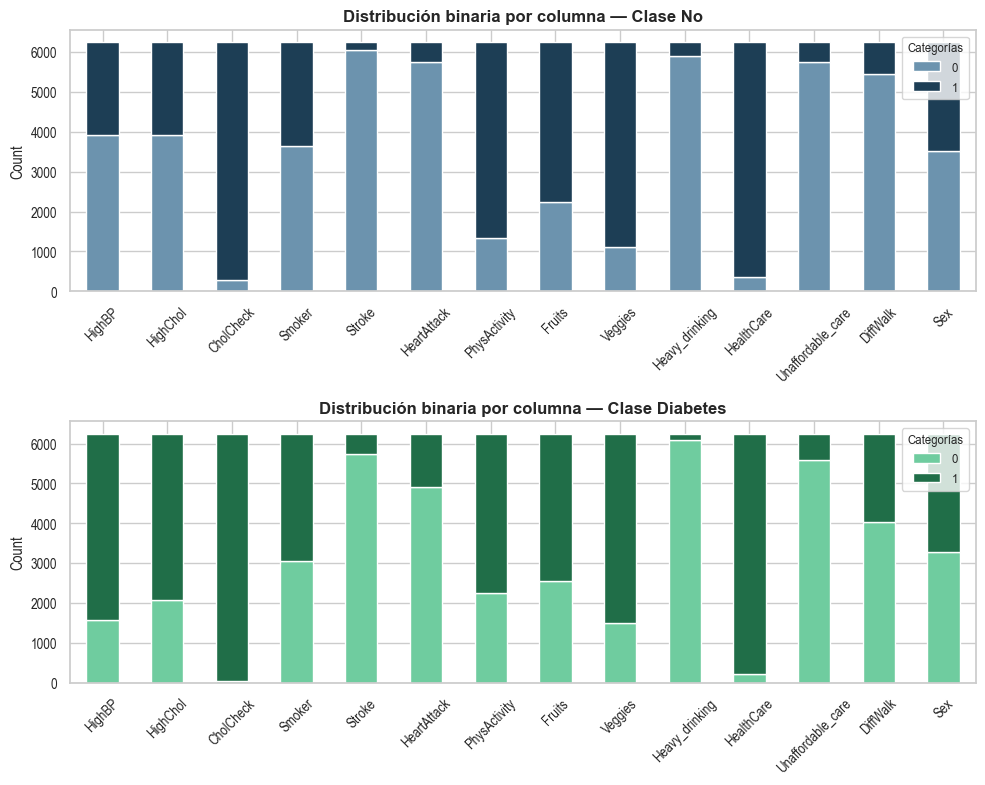

In [25]:
# ====== Distribuciones por clase del target (stacked binary categorical, viridis tones) =======

unique_classes = sorted(df[TARGET_COL].dropna().unique())

# Seleccionar variables categóricas binarias
binary_cats = [col for col in categorical_vars if df[col].nunique(dropna=True) == 2]

if len(binary_cats) == 0:
    raise ValueError("No se han encontrado variables categóricas binarias en 'categorical_vars'.")

# Tomamos los primeros colores de viridis según nº clases
base_colors = sns.color_palette("viridis", n_colors=len(unique_classes))

# Crear tonos claro & oscuro para cada clase
class_colors = {}
for i, cls in enumerate(unique_classes):
    base = np.array(base_colors[i])
    # generar tonos:
    light = (base + 0.40) / 1.40   # aclarado
    dark  = base * 0.60            # oscurecido
    class_colors[cls] = [light, dark]   # [NO, YES]

# Crear figura con una fila por cada clase
n_rows = len(unique_classes)
fig, axes = plt.subplots(n_rows, 1, figsize=(10, 4 * n_rows), squeeze=False)

for i, target_val in enumerate(unique_classes):
    ax = axes[i, 0]

    # Conteos por variable
    cat_counts = pd.DataFrame({
        col: df[df[TARGET_COL] == target_val][col].value_counts(dropna=False)
        for col in binary_cats
    }).T.fillna(0)

    # colores claro (No) y oscuro (Yes) según clase
    colors = class_colors[target_val]
    labels = list(cat_counts.columns.astype(str))  # usa 0/1 reales como etiquetas

    cat_counts.plot(kind="bar", stacked=True, ax=ax, color=colors)

    ax.set_ylabel("Count")
    ax.set_xticklabels(cat_counts.index, rotation=45)
    ax.set_title(f"Distribución binaria por columna — Clase {data_dict[TARGET_COL]['map'].get(str(target_val))}", fontsize=12, weight='bold')
    ax.legend(labels=labels, title='Categorías', fontsize=10, title_fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()



Comparando arriba la proporción de diabéticos de cada variable arriba y abajo se puede ver si hay diferencias entre grupos,según sus valores y la variable objetivo. Se ve más facil estudiando los porcentajes de diabéticos en cada una de las clases porque hay condiciones sobre todo en el dominio médico que se dan muy pocas veces pero que aparezcan proporciona mucha información y en la gráfica de antes esto se puede no ver. Como tenemos el dataset balanceado si no hay influencias saldrá en ambas clases 50% diabéticos y 50% no pero si hay desequilibrios eso nos da información. 


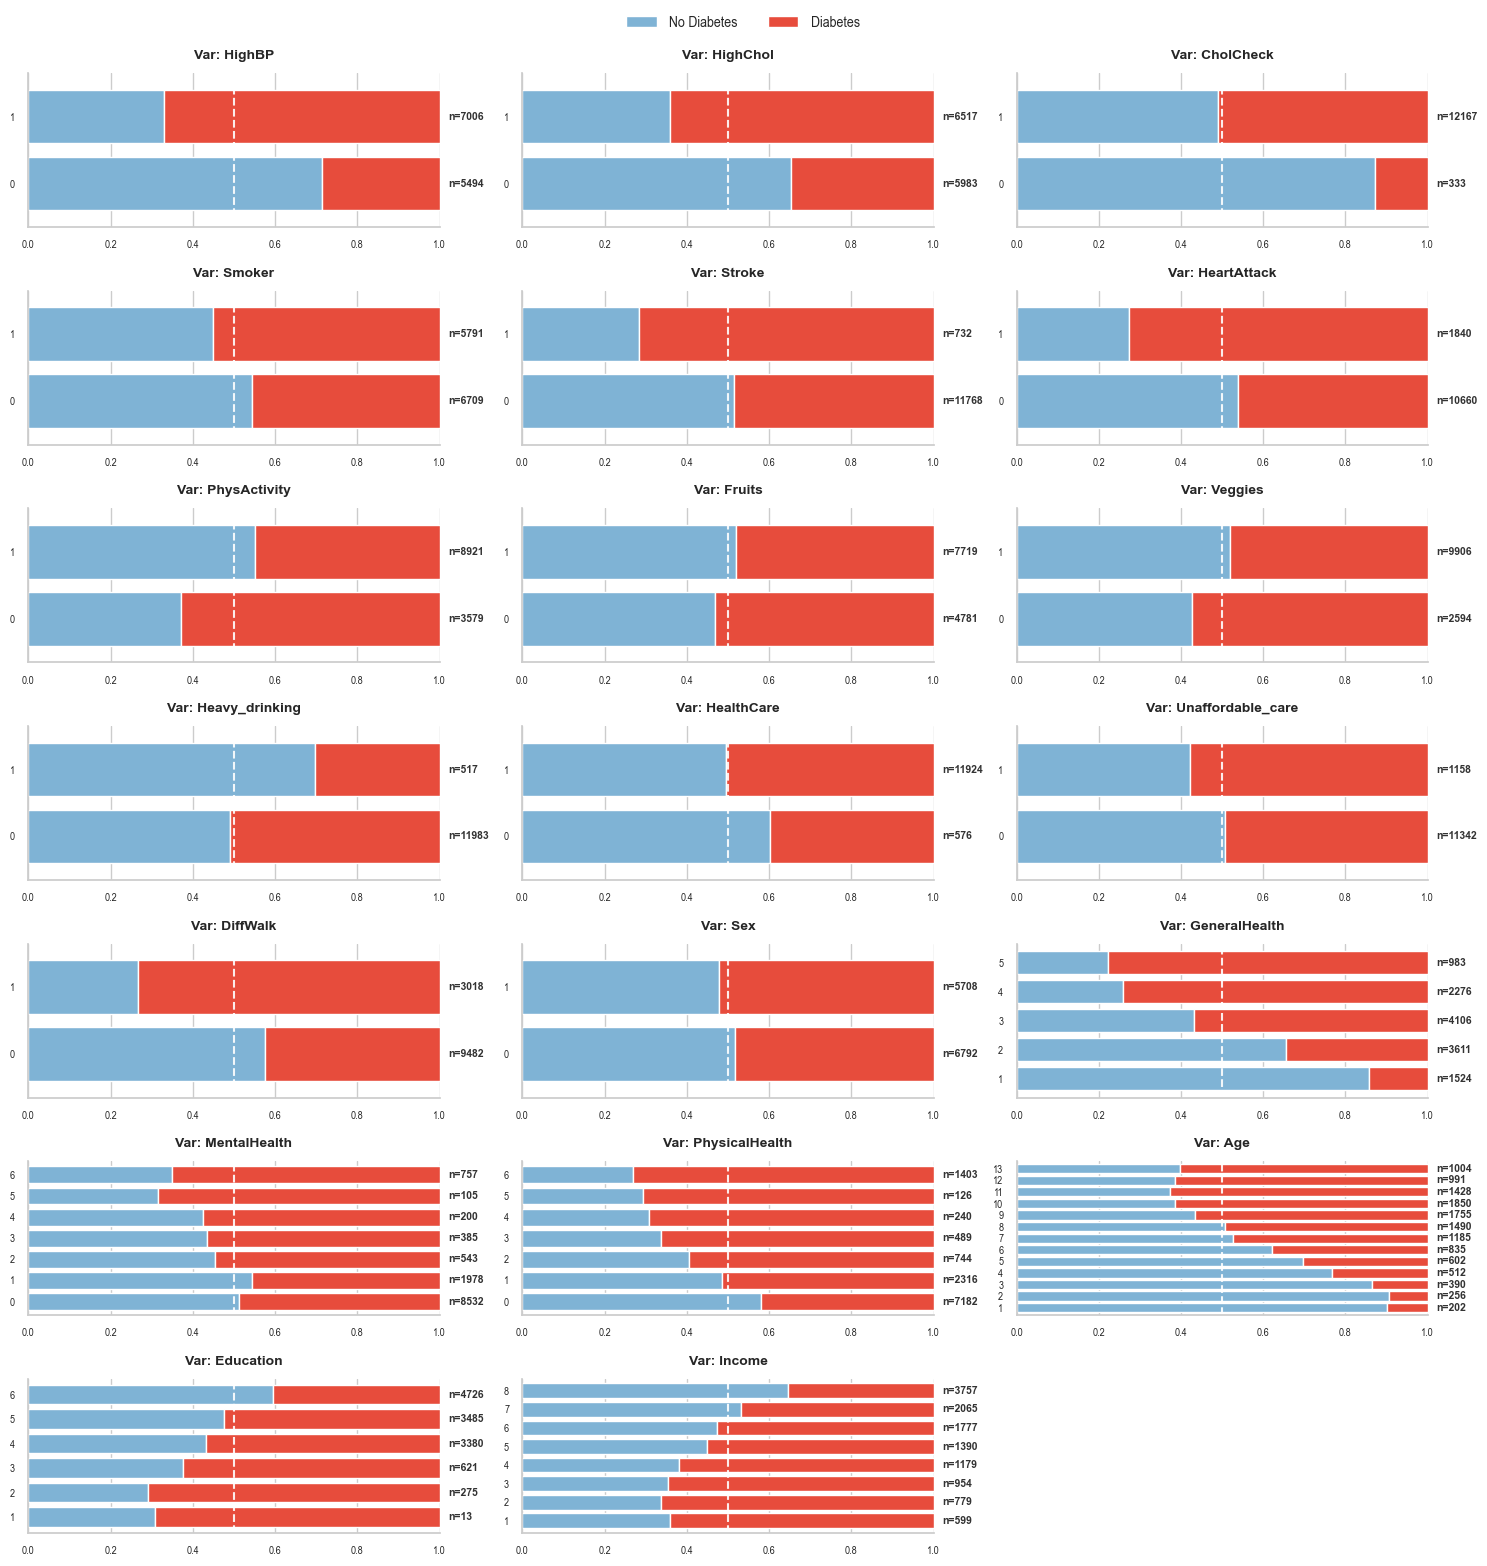

In [26]:

def plot_compact_balanced_analysis(df, variables, target, cols=3):
    """
    Genera una cuadrícula compacta de gráficos de barras normalizados al 100%.
    Ideal para datos balanceados 1:1.
    """
    # 1. Filtrar variables que realmente existen en el DataFrame
    vars_validas = [v for v in variables if v in df.columns]
    
    if not vars_validas:
        print("No se encontraron variables válidas para graficar.")
        return

    # 2. Configuración de la cuadrícula (Grid)
    n_vars = len(vars_validas)
    rows = math.ceil(n_vars / cols)
    
    # Tamaño de celda: 5 de ancho x 2.2 de alto
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 2.2))
    axes = axes.flatten()

    # 3. Colores y Estilo
    # Azul suave para No Diabetes, Rojo suave para Diabetes
    colors = ['#7fb3d5', '#e74c3c'] 

    for i, var in enumerate(vars_validas):
        ax = axes[i]
        
        # Calcular tabla de contingencia normalizada (0.0 a 1.0)
        # Como tus datos son 1:1, el azar es 0.5
        ct = pd.crosstab(df[var], df[target], normalize='index')
        counts = df[var].value_counts().sort_index()
        
        # Graficar barras horizontales apiladas
        ct.plot(kind='barh', stacked=True, ax=ax, color=colors, legend=False, width=0.8)
        
        # Línea de referencia en el 50% (Punto de equilibrio)
        ax.axvline(0.5, color='white', linestyle='--', linewidth=1.5, alpha=0.9)
        
        # Añadir n= al final de cada barra para detectar bajas frecuencias
        for j, (idx, count) in enumerate(counts.items()):
            ax.text(1.02, j, f"n={count}", va='center', fontsize=7.5, fontweight='bold', color='#333333')
        
        # Estética de los ejes
        ax.set_title(f"Var: {var}", fontsize=10, weight='bold', pad=10)
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_xlim(0, 1) # Asegurar escala 0 a 100%
        ax.tick_params(axis='both', which='major', labelsize=8)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    # 4. Limpiar espacios vacíos en el grid
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # 5. Leyenda Global Superior
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, ['No Diabetes', 'Diabetes'], loc='upper center', 
               bbox_to_anchor=(0.5, 1.02), ncol=2, fontsize=11, frameon=False)

    plt.tight_layout()
    plt.show()

# --- EJECUCIÓN DEL BLOQUE ---
# Unimos tus listas de variables y lanzamos el gráfico
features_analisis = categorical_vars + ordinal_vars
plot_compact_balanced_analysis(df, features_analisis, TARGET_COL, cols=3)

Por ejemplo se ve que la variable fruits en ambas categorías la proporción de diabéticos está cerca del 50% por lo que esta variable seguramente no será muy relevante (si solo se tiene en cuenta la relación entre la variable y la variable objetivo). Mientras en la age se ve bastante cambio en la proporcion de diabéticos en cada uno de los rangos de edad. Ojo la Cholchek que hay poca proporción de diabéticos cuando es 0, pero notar que esta condicion de 0 la tenemos muy pocas ocasiones (ojo pq en los features selection aparece de las últimas)

In [27]:
# Guardar
# df.to_csv("data/df_processed.csv", index=False)

### Feature subset selection
Primero mediante filters: independientes del modelo
Para el método chi^2 es para variables categóricas discretas por tanto hay q discretizar la BMI, las otras ordinales ya las hemos discretizado. Se va a discretizar según las clases definidas médicamente en españa https://www.laverdaddesupeso.es/que-es-la-obesidad.html?cid=pse-kdj0hz4wss&s_kwcid=AL%2110025%213%21723935839582%21p%21%21g%21%21indice%20de%20masa%20corporal%20obesidad&gad_source=1&gad_campaignid=21969801555&gbraid=0AAAAACL_4kc479zYPTDW39mEvgDKb8pGl&gclid=Cj0KCQiAjJTKBhCjARIsAIMC44-4Aa3i46dcvLCaECVUNhLtYetZl9BzZkU0Q86wIo_bjEXVuoLd-jQaAl6HEALw_wcB 
    Bajo peso —    < 18.5 kg/m² 
 	 Normal — 18.5–24.9 kg/m² 
 	 Sobrepeso — 25.0–29.9 kg/m² 
 	 Obesidad Clase I — 30.0-34.9 kg/m²
 	 Obesidad Clase II — 35.0–39.9 kg/m²  
 	 Obesidad Clase III — > 40 kg/m² 

In [28]:

bins = [0, 18.5, 25, 30, 35,40,100]
labels = [0,1,2,3,4,5]
df['BMI_binned'] = pd.cut(df['BMI'], bins=bins, labels=labels)
#print(df['BMI_binned'].value_counts()) #nos aseguramos de que en todos los bins haya datos

from sklearn.feature_selection import SelectKBest, chi2
# Seleccionamos columnas para Chi²
features_chi2 = list(categorical_vars) + list(ordinal_vars) + ['BMI_binned']
X_chi2=df[features_chi2] #solo contiene las variables
y_chi2=df[TARGET_COL]

# 2. Configurar el selector para encontrar las 'k' mejores variables
# Vamos a pedirle que analice todas las variables de df_chi2
selector = SelectKBest(score_func=chi2, k=15)

# 3. Ajustar el selector a los datos
# Usamos 'y' que es la columna 'Diabetes' que definieron antes
selector.fit(X_chi2, y_chi2)
selected_features = X_chi2.columns[selector.get_support()]
print("Features seleccionadas:", list(selected_features))

#Usar selector.transform para crear los dataframes con esas variables

# 4. Crear un resumen de los resultados (salen todas las variables)
scores_df = pd.DataFrame({
    'Variable': features_chi2,
    'Puntaje_Chi2': selector.scores_,
    'P-Value': selector.pvalues_
}).sort_values(by='Puntaje_Chi2', ascending=False)

# 5. Mostrar los resultados
print("Resultados de la importancia de variables (Chi-Square):")
display(scores_df)


Features seleccionadas: ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'HeartAttack', 'PhysActivity', 'Heavy_drinking', 'DiffWalk', 'GeneralHealth', 'MentalHealth', 'PhysicalHealth', 'Age', 'Education', 'Income', 'BMI_binned']
Resultados de la importancia de variables (Chi-Square):


,Variable,Puntaje_Chi2,P-Value
16,PhysicalHealth,1862.832973,0.000000e+00
17,Age,969.398025,8.056302e-213
14,GeneralHealth,855.044580,5.819261e-188
0,HighBP,799.023123,8.799377e-176
20,BMI_binned,670.281685,8.676555e-148
12,DiffWalk,662.490391,4.292760e-146
1,HighChol,515.557619,3.917858e-114
19,Income,455.320215,5.015388e-101
5,HeartAttack,378.019565,3.358427e-84
15,MentalHealth,305.028356,2.644184e-68


<>:22: SyntaxWarning: invalid escape sequence '\c'
<>:22: SyntaxWarning: invalid escape sequence '\c'
C:\Users\SergioBeamonteGonzal\AppData\Local\Temp\ipykernel_9012\225660929.py:22: SyntaxWarning: invalid escape sequence '\c'
  plt.title("Knee Plot: Importancia de Variables por Chi-Square ($\chi^2$)", fontsize=16, weight='bold', pad=25)


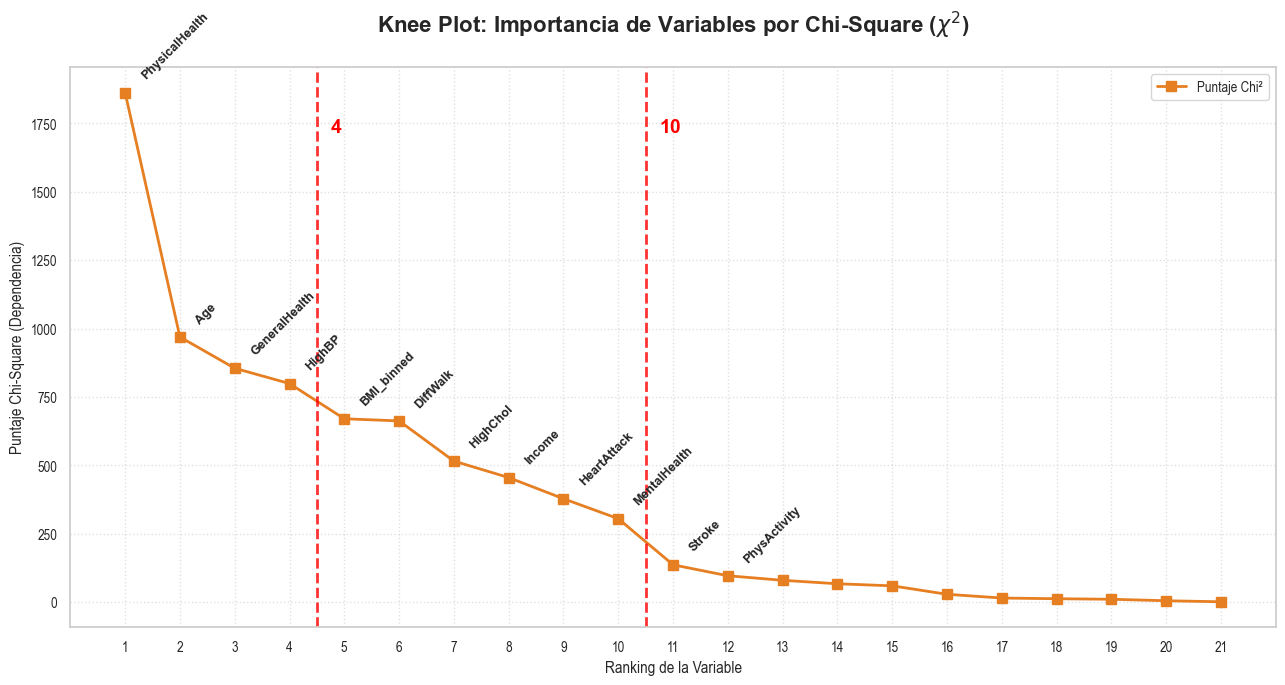

In [34]:
###KNEE PLOT####
# 1. Preparar los datos del ranking (ya están ordenados en tu scores_df)
scores_chi2 = scores_df['Puntaje_Chi2'].values
nombres_vars = scores_df['Variable'].values
rankings = range(1, len(scores_chi2) + 1)

# 2. Crear la figura
plt.figure(figsize=(13, 7))

# Dibujar la línea de codo
plt.plot(rankings, scores_chi2, marker='s', linestyle='-', color='#e67e22', 
         linewidth=2, markersize=7, label='Puntaje Chi²')

# 3. Etiquetar las variables más importantes para identificarlas rápido
for i, txt in enumerate(nombres_vars[:12]): # Etiquetamos las primeras 12
    plt.annotate(txt, (rankings[i], scores_chi2[i]), 
                 xytext=(10, 10), textcoords='offset points', 
                 fontsize=9, fontweight='bold', rotation=45)
    

# 4. Configuración estética
plt.title("Knee Plot: Importancia de Variables por Chi-Square ($\chi^2$)", fontsize=16, weight='bold', pad=25)
plt.xlabel("Ranking de la Variable", fontsize=12)
plt.ylabel("Puntaje Chi-Square (Dependencia)", fontsize=12)
plt.xticks(rankings) # Muestra todos los números del 1 al 21
plt.grid(axis='both', linestyle=':', alpha=0.6)
plt.legend()

# 5. Líneas verticales de corte sugeridas
plt.axvline(x=4.5, color='red', linestyle='--', linewidth=2, alpha=0.8)
plt.axvline(x=10.5, color='red', linestyle='--', linewidth=2, alpha=0.8)

# Etiquetas de los cortes
plt.text(4.5 + 0.25, max(scores_chi2)*0.95, '4',
         color='red', fontsize=14, fontweight='bold',
         ha='left', va='top')

plt.text(10.5 + 0.25, max(scores_chi2)*0.95, '10',
         color='red', fontsize=14, fontweight='bold',
         ha='left', va='top')

# Añadir una zona de "corte" sugerida si se ve un cambio brusco
plt.tight_layout()
plt.show()

Notar como aquí CholCheck que tenía tanto efecto en la target variable cuando era 0 aparece de las ultimas, esto se debe a que el número de observaciones de esa clase es muy pequeño (en torno al 2.5%) y entonces métodos estadísticos como el chi^2 desconfía de categorías raras como esta, es conservador y depende del número de observaciones (porque compara con frecuencias esperadas). Pero nosotros no lo podemos ignorar porque es un caso que en la realidad ocurre en estas proporciones pero no por ello es menos importante, es evento raro pero clínicamente relevante. 

Otra forma es por mutual information: detecta relaciones lineales y no lineales. En este caso puede trabajar tb con numéricas, por lo que no utilizaremos la versión de BMI binneada. hAY QUE ESPECIFICARLE A LA FUNCIÓN QUÉ VARIABLES SON LAS DISCRETAS.  



Importancia de variables por Mutual Information:


,Variable,MI_Score
14,GeneralHealth,0.086344
0,HighBP,0.074719
20,BMI,0.052341
17,Age,0.047844
1,HighChol,0.043731
12,DiffWalk,0.036032
16,PhysicalHealth,0.025478
19,Income,0.025322
5,HeartAttack,0.018299
6,PhysActivity,0.013575


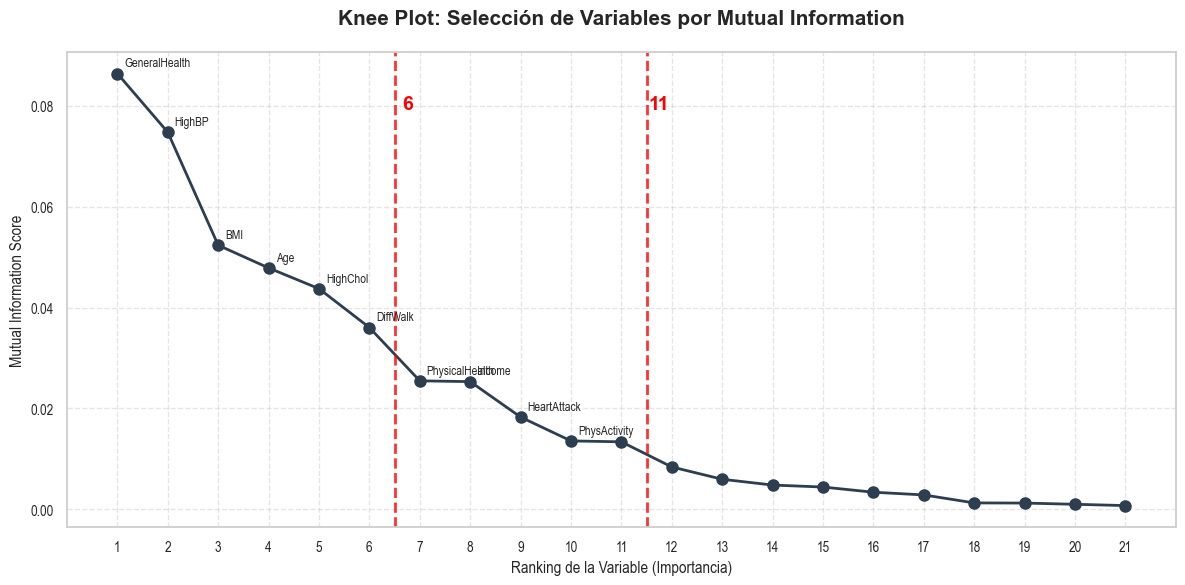

In [36]:
from sklearn.feature_selection import mutual_info_classif

# 1. Definimos las variables (Usamos BMI original para no perder info)
features_mi = list(categorical_vars) + list(ordinal_vars) + ['BMI']
X_mi = df[features_mi].copy()

# 2. Creamos la máscara de variables discretas
# Queremos que sea True para todas EXCEPTO para 'BMI'
discrete_mask = [col != 'BMI' for col in features_mi]
mi_scores = mutual_info_classif(X_mi, df[TARGET_COL], discrete_features=discrete_mask, random_state=42)

# 4. Resultados
mi_results = pd.DataFrame({
    'Variable': features_mi,
    'MI_Score': mi_scores
}).sort_values(by='MI_Score', ascending=False)

print("Importancia de variables por Mutual Information:")
display(mi_results)

#PINTAMOS KNEE-PLOT PARA VER SI PODEMOS ENCONTRAR EL PUNTO DE CORTE VISUALMENTE
# 1. Preparamos los datos (mi_results ya está ordenado de mayor a menor)
scores = mi_results['MI_Score'].values
variables = mi_results['Variable'].values
ranks = range(1, len(scores) + 1)

# 2. Creamos la figura
plt.figure(figsize=(12, 6))

# Pintamos la línea y los puntos
plt.plot(ranks, scores, marker='o', linestyle='-', color='#2c3e50', linewidth=2, markersize=8)

# 3. Añadimos etiquetas de los nombres de las variables (solo las primeras para no saturar)
# Esto ayuda a ver "quién" se queda fuera del corte
for i, txt in enumerate(variables[:10]): # Etiquetamos las 10 primeras
    plt.annotate(txt, (ranks[i], scores[i]), xytext=(5, 5), textcoords='offset points', fontsize=9)

# 4. Formato estético
plt.title("Knee Plot: Selección de Variables por Mutual Information", fontsize=15, weight='bold', pad=20)
plt.xlabel("Ranking de la Variable (Importancia)", fontsize=12)
plt.ylabel("Mutual Information Score", fontsize=12)
plt.xticks(ranks) # Que se vean todos los números de ranking
plt.grid(axis='both', linestyle='--', alpha=0.5)

# 5. Líneas verticales de corte sugeridas
plt.axvline(x=6.5, color='red', linestyle='--', linewidth=2, alpha=0.8)
plt.axvline(x=11.5, color='red', linestyle='--', linewidth=2, alpha=0.8)

# Etiquetas de los cortes
plt.text(6.5 + 0.25, max(scores)*0.95, '6',
         color='red', fontsize=14, fontweight='bold',
         ha='center', va='top')

plt.text(11.5 + 0.25, max(scores)*0.95, '11',
         color='red', fontsize=14, fontweight='bold',
         ha='center', va='top')


plt.tight_layout()
plt.show()

Como lo más similar encontrado a CFS con la lógica de:
Máxima Relevancia: Que la variable explique mucho al objetivo (Diabetes).
Mínima Redundancia: Que las variables elegidas no se parezcan entre sí.
En el ecosistema de Python utilizamos mRMR (Minimum Redundancy Maximum Relevance)
Así además de mirar la importancia con la variable objetivo evitaremos incluir dos variables que nos den información muy similar dejando hueco en nuestra selección a variables q aporten nueva info. 
Es verdad que da un resultado muy similar a los otros, salvo que el heavy_drinking sube en el ranking pero las variables que son últimas lo son en los 3 algoritmos probados SON LAS MISMAS PRÁCTICAMENTE. 
Es vd q el efecto no se nota mucho pq estudiando las correlaciones la variable con la correlación más alta es Physical Health que está un poco por encima del 0.5 (relacionada con General Health e Income), no hay variables muy correlacionadas.   Notar que aquí el cholchelk si que aparece en tre las primeras (bien hecho) seguramente porque sea una variable rara que le aporta información única auqnue aparezca en pocas ocasiones.



In [ ]:
#Este algoritmo de nuevo acepta variables continuas, usamos el mismo dataframe que para Mutual Information
from mrmr import mrmr_classif

selected_features = mrmr_classif(X=X_mi, y=df[TARGET_COL], K=21) #cambiar pongo 21 para verlas todas en orden

# 3. Mostrar el resultado

print("### MEJOR SUBSET SELECCIONADO (mRMR) ###")

print(selected_features)


100%|██████████| 21/21 [00:05<00:00,  3.94it/s]

### MEJOR SUBSET SELECCIONADO (mRMR) ###
['GeneralHealth', 'HighBP', 'BMI', 'Age', 'HighChol', 'DiffWalk', 'Income', 'CholCheck', 'HeartAttack', 'PhysicalHealth', 'Heavy_drinking', 'PhysActivity', 'Education', 'Stroke', 'Smoker', 'Veggies', 'MentalHealth', 'HealthCare', 'Fruits', 'Sex', 'Unaffordable_care']
